# Modeling and Simulation in Python

Starter code for the orbit example

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [65]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

### Earth falling into the sun

Here's a question from the web site [Ask an Astronomer](http://curious.astro.cornell.edu/about-us/39-our-solar-system/the-earth/other-catastrophes/57-how-long-would-it-take-the-earth-to-fall-into-the-sun-intermediate):

"If the Earth suddenly stopped orbiting the Sun, I know eventually it would be pulled in by the Sun's gravity and hit it. How long would it take the Earth to hit the Sun? I imagine it would go slowly at first and then pick up speed."

Here's a solution.

In [142]:
# Here are the units we'll need

s = UNITS.second
N = UNITS.newton
kg = UNITS.kilogram
m = UNITS.meter
year = UNITS.year

<Unit('year')>

In [67]:
# And an inition condition (with everything in SI units)

r_0 = 147e9 * m

init = State(r = r_0,
             v = 0 * m / s)

,values
r,147000000000.0 meter
v,0.0 meter / second


In [143]:
# Making a system object

r_earth = 6.371e6 * m
r_sun = 695.508e6 * m

init = State(x = r_0, y = 0, 
              vx = 0, vy = 30330)

system = System(init=init,
                G=6.674e-11 * N / kg**2 * m**2,
                m1=1.989e30 * kg,
                r_final=r_sun + r_earth,
                m2=5.972e24 * kg,
                t_0=0 * s,
                t_end=1 * year)

,values
init,x 147000000000.0 meter y ...
G,6.674e-11 meter ** 2 * newton / kilogram ** 2
m1,1.989e+30 kilogram
r_final,701879000.0 meter
m2,5.972e+24 kilogram
t_0,0 second
t_end,1 year


In [156]:
# Here's a function that computes the force of gravity

def universal_gravitation2d(r, system):

    unpack(system)
    
    mag = -G * m1 * m2 / r.mag**2
    angle = r.hat()
    
    force = angle * mag
    return force

In [157]:
def slope_func2d(state, t, system):
    """Computes derivatives of the state variables.
    
    state: State (x, y, x velocity, y velocity)
    t: time
    system: System object with g, rho, C_d, area, mass
    
    returns: sequence (vx, vy, ax, ay)
    """
    x, y, vx, vy = state
    unpack(system)

    r = Vector(x, y)    
    a_grav = universal_gravitation2d(r, system) / m2
    

    
    return vx, vy, a_grav.x, a_grav.y

In [158]:
def event_func2d(state, t, system):
    x, y, vx, vy = state
    
    r = Vector(x,y)
    
    return r.mag - system.r_final

In [159]:
slope_func2d(init, 0, system)

(0,
 30330,
 <Quantity(-0.006143082049146188, 'newton / kilogram')>,
 <Quantity(-0.0, 'newton / kilogram')>)

In [160]:
results_2d, details_2d = run_ode_solver(system, slope_func2d, events=event_func2d)
details

,values
sol,None
t_events,[[5432658.401694092]]
nfev,236
njev,0
nlu,0
status,1
message,A termination event occurred.
success,True


In [161]:
# Here's how long it takes...

t_final = get_last_label(results) * s

<Quantity(1.5115280142443845e-28, 'second')>

In [162]:
# ... expressed in units we understand

t_final.to(UNITS.day)

<Quantity(1.7494537201902595e-33, 'day')>

In [163]:
# Before plotting, we run the simulation again with `t_eval`

ts = linspace(t_0, t_final, 201)
results2d, details2d = run_ode_solver(system, slope_func2d, events=event_func2d, t_eval=ts)

In [164]:
# Scaling the time steps to days

results.index /= 60 * 60 * 24

In [165]:
# Scaling the distance to million km

r = results.r / 1e9;

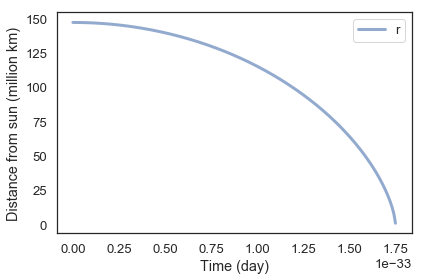

In [166]:
# And plotting

plot(r, label='r')

decorate(xlabel='Time (day)',
         ylabel='Distance from sun (million km)')

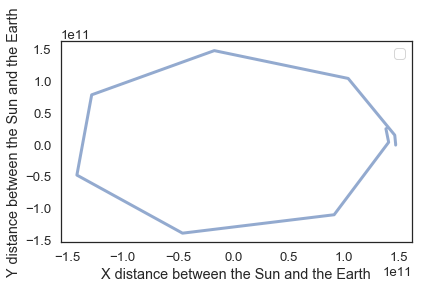

In [167]:
plot(results_2d.x.values, results_2d.y.values)

decorate(xlabel='X distance between the Sun and the Earth',
         ylabel='Y distance between the Sun and the Earth')